 Author: RAJAT HANDA

In [76]:
import numpy as np
import pandas as pd
from sklearn import linear_model as lm
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge
import scipy.stats as stat
import matplotlib.pyplot as plt
%matplotlib inline

## Train Dataset

In [2]:
df_train=pd.read_csv('Pr_train_20.csv',parse_dates=['PERIOD (FORMATTED)'],index_col='PERIOD (FORMATTED)',
                 infer_datetime_format=True, encoding='utf-8')

In [3]:
df_train.head()

,IDENTIFIER,RANK,1M_RET,MCAP,1SS_ERNQLT,IST_SURPY1,ACCX,ARM_PFD_COMP,RET24M_L1M,RSI_12M.1,...,CASH_P.1,EV.1,RVM_CFO_AST.1,VALUE_COM.1,QUALITY.1,RISK,TECHNICAL1.1,PP_RANK,FUTURE 24 WEEK RETURNS,Excess
PERIOD (FORMATTED),,,,,,,,,,,,,,,,,,,,,
2015-08-07,B66Y3W,0.000710,-0.001156,-0.000904,0.001082,0.000016,-0.004091,-0.288839,-0.002757,-0.115162,...,-0.002576,0.000341,0.012645,-0.009822,-0.019840,0.014736,-0.147384,-0.244777,-21.837562,-25.108537
2015-08-14,46625H10,-0.457558,-0.000262,0.039349,0.018936,0.000187,0.019779,-0.036314,0.000010,0.031485,...,0.032568,0.016625,0.003394,0.021311,-0.001720,0.005954,0.041049,0.068354,-11.073070,-14.344045
2015-08-14,22531010,-0.437356,-0.001977,-0.001736,0.130047,0.000200,0.013598,0.236413,0.004571,0.058348,...,-0.001472,-0.001722,-0.007786,-0.100819,0.001062,0.059482,-0.050510,-0.436697,-13.421253,-16.692228
2015-08-14,68193610,0.037392,0.000447,-0.001328,-0.354802,0.000248,0.019990,0.256615,-0.000507,-0.014272,...,-0.001069,-0.001453,0.003451,0.002316,-0.004681,0.011318,-0.024707,-0.315484,-9.963345,-13.234320
2015-08-14,05348410,-0.417154,0.000501,0.001474,0.018936,0.000332,0.005642,0.377827,-0.000229,0.030606,...,-0.002477,0.000800,-0.047704,-0.052720,-0.002440,0.020004,0.103849,-0.396293,-1.768926,-5.039901


In [4]:
cols_to_not_use = {'Excess','FUTURE 24 WEEK RETURNS', 'IDENTIFIER', 'PERIOD (FORMATTED)'}
cols_to_use = list(filter(lambda c: c not in cols_to_not_use, df_train.columns))

## Linear Model

In [40]:
lm_model=lm.LinearRegression()

In [12]:
df_train[cols_to_use]

,RANK,1M_RET,MCAP,1SS_ERNQLT,IST_SURPY1,ACCX,ARM_PFD_COMP,RET24M_L1M,RSI_12M.1,MIN12M.1,CASH_P.1,EV.1,RVM_CFO_AST.1,VALUE_COM.1,QUALITY.1,RISK,TECHNICAL1.1,PP_RANK
PERIOD (FORMATTED),,,,,,,,,,,,,,,,,,
2015-08-07,0.000710,-0.001156,-0.000904,0.001082,1.567468e-05,-0.004091,-0.288839,-0.002757,-0.115162,-0.004266,-0.002576,0.000341,0.012645,-0.009822,-0.019840,0.014736,-0.147384,-0.244777
2015-08-14,-0.457558,-0.000262,0.039349,0.018936,1.870140e-04,0.019779,-0.036314,0.000010,0.031485,0.000592,0.032568,0.016625,0.003394,0.021311,-0.001720,0.005954,0.041049,0.068354
2015-08-14,-0.437356,-0.001977,-0.001736,0.130047,2.003967e-04,0.013598,0.236413,0.004571,0.058348,0.010132,-0.001472,-0.001722,-0.007786,-0.100819,0.001062,0.059482,-0.050510,-0.436697
2015-08-14,0.037392,0.000447,-0.001328,-0.354802,2.484239e-04,0.019990,0.256615,-0.000507,-0.014272,0.005278,-0.001069,-0.001453,0.003451,0.002316,-0.004681,0.011318,-0.024707,-0.315484
2015-08-14,-0.417154,0.000501,0.001474,0.018936,3.322702e-04,0.005642,0.377827,-0.000229,0.030606,0.011014,-0.002477,0.000800,-0.047704,-0.052720,-0.002440,0.020004,0.103849,-0.396293
2015-08-14,0.370725,0.000484,-0.001142,0.140148,1.589949e-04,0.005382,-0.086819,-0.000015,0.038316,0.013178,-0.002414,-0.001401,-0.012496,-0.046897,-0.005309,-0.042108,0.131336,-0.335687
2015-08-14,-0.366649,0.000009,-0.001945,0.231057,1.369016e-04,0.004044,0.256615,0.000103,0.042583,0.027982,0.003591,-0.002119,0.022075,0.047071,-0.004768,0.007796,0.109461,0.229970
2015-08-14,0.239412,-0.000891,-0.001996,0.018936,-5.307079e-08,-0.007262,-0.056516,-0.000901,-0.056039,0.016805,-0.001813,-0.002037,-0.002349,-0.052663,0.061409,-0.002443,-0.038427,-0.497303
2015-08-14,-0.023214,0.000373,-0.000135,-0.314398,4.352641e-05,0.012832,-0.076718,0.000885,0.020416,0.016459,-0.002576,-0.000898,-0.038901,-0.014430,0.021265,0.007070,0.150514,-0.295282


In [41]:
lm_model.fit(df_train[cols_to_use], df_train['Excess'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
lm_model.intercept_

0.025563112230195442

In [29]:
lm_model.coef_

array([ -5.46112019e-01,  -1.22610048e+03,  -5.71578099e+00,
         2.09968064e+00,   6.09774707e+01,  -3.08410836e+00,
         4.44708780e+00,  -4.78581044e+02,   2.21603743e+01,
         1.01122168e+01,   3.09835435e+01,  -4.26309016e+01,
         5.48573696e+00,   1.78640203e+01,   4.39530419e+00,
        -4.81450718e+00,   6.99491229e+00,  -2.17300092e+00])

## Extra Tree Regressor

In [5]:
ETR_model = ExtraTreesRegressor(n_estimators=100, max_depth=4, n_jobs=-1, random_state=17, verbose=0)
model2 = ETR_model.fit(df_train[cols_to_use], df_train['Excess'])

## Ridge

In [30]:
Rid=Ridge()
model3=Rid.fit(df_train[cols_to_use], df_train['Excess'])

## test data

In [7]:
df_test=pd.read_csv('Pr_test_20.csv',parse_dates=['PERIOD (FORMATTED)'],index_col='PERIOD (FORMATTED)',
                 infer_datetime_format=True, encoding='utf-8')

## Model Predicitons

### Linear Model

In [42]:
Preds_Excess=lm_model.predict(df_test[cols_to_use])

### Extra Tree

In [8]:
Preds_Excess_2=model2.predict(df_test[cols_to_use])

### Ridge

In [31]:
Preds_Excess_4=model3.predict(df_test[cols_to_use])

### COMBINING EXTRA TREE AND RIDGE

In [67]:
Preds_Excess_3=(model2.predict(df_test[cols_to_use])*0.95)+(model3.predict(df_test[cols_to_use])*0.05)

## Validating our model

### Linear Model

In [43]:
#MAE
metrics.mean_absolute_error(df_test['Excess'],Preds_Excess)

13.837777519024524

In [44]:
#MSE
metrics.mean_squared_error(df_test['Excess'],Preds_Excess)

373.86423050532272

In [45]:
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess))

19.335569050465587

In [46]:
#MAPE
np.mean(np.abs((df_test['Excess'] - Preds_Excess) / df_test['Excess'])) * 100

284.58477535061178

In [47]:
# Spearman Coorelation
stat.spearmanr(df_test['Excess'],Preds_Excess)[0]

0.037162181993491576

### Extra Tree

In [9]:
#MAE
metrics.mean_absolute_error(df_test['Excess'],Preds_Excess_2)

13.742206810730359

In [10]:
#MSE
metrics.mean_squared_error(df_test['Excess'],Preds_Excess_2)

358.21138932465084

In [11]:
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_2))

18.926473240534033

In [12]:
#MAPE
np.mean(np.abs((df_test['Excess'] - Preds_Excess_2) / df_test['Excess'])) * 100


199.11265152620362

In [38]:
# Spearman Coorelation
stat.spearmanr(df_test['Excess'],Preds_Excess_2)[0]

0.048775937022596999

### Ridge

In [32]:
#MAE
metrics.mean_absolute_error(df_test['Excess'],Preds_Excess_4)

13.817997567014469

In [33]:
#MSE
metrics.mean_squared_error(df_test['Excess'],Preds_Excess_4)

361.5441972860533

In [34]:
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_4))

19.014315588157604

In [35]:
#MAPE
np.mean(np.abs((df_test['Excess'] - Preds_Excess_4) / df_test['Excess'])) * 100


283.51281964876716

In [37]:
# Spearman Coorelation
stat.spearmanr(df_test['Excess'],Preds_Excess_4)[0]

0.038977849142670024

### Combining EXTRA TREE AND RIDGE

In [68]:
#MAE
metrics.mean_absolute_error(df_test['Excess'],Preds_Excess_3)

13.742653583970375

In [69]:
#MSE
metrics.mean_squared_error(df_test['Excess'],Preds_Excess_3)

358.08081137131251

In [70]:
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_3))

18.923023314769566

In [71]:
#MAPE
np.mean(np.abs((df_test['Excess'] - Preds_Excess_3) / df_test['Excess'])) * 100

201.64155498760036

In [72]:
# Spearman Coorelation
stat.spearmanr(df_test['Excess'],Preds_Excess_3)[0]

0.048840642670072806

In [73]:
imp = pd.DataFrame(index=cols_to_use)
imp['train'] = pd.Series(model2.feature_importances_, index=cols_to_use)

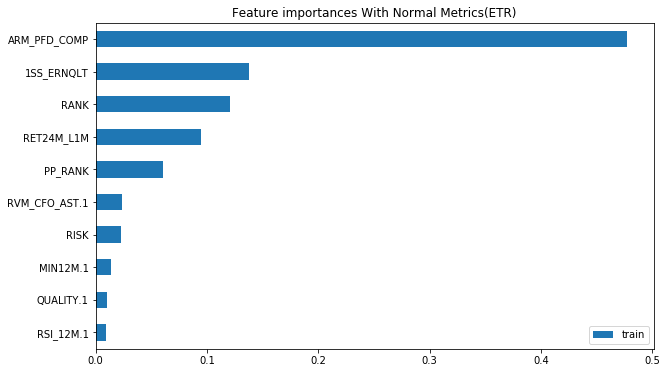

In [83]:
ax = imp.sort_values('train').tail(10).plot.barh(title='Feature importances With Normal Metrics(ETR)', figsize=(10,6))

In [84]:
imp_R = pd.DataFrame(index=cols_to_use)
imp_R['train'] = pd.Series(model3.coef_, index=cols_to_use)

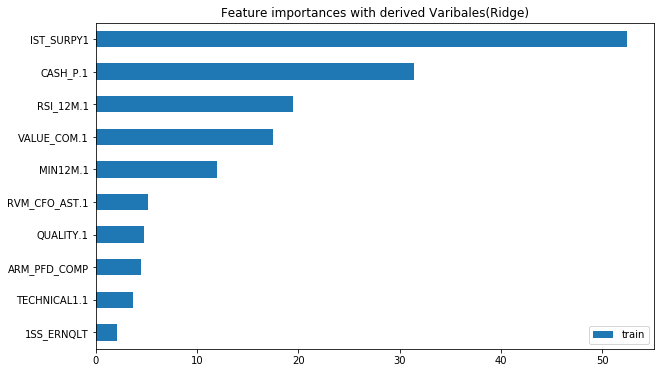

In [85]:
ax = imp_R.sort_values('train').tail(10).plot.barh(title='Feature importances with derived Varibales(Ridge)', figsize=(10,6))